In [64]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [65]:
# load load_breast_cancer
dataset = load_breast_cancer()

#creating input dataset
in_dex1 = np.where(dataset["feature_names"]=="mean area")[0][0]
in_dex2 = np.where(dataset["feature_names"]=="mean concave points")[0][0]

X_area = dataset["data"][:,in_dex1]
X_concave_points = dataset["data"][:,in_dex2]

X = np.array([X_area, X_concave_points]).T

#creatinh output dataset
out_dex1 = np.where(dataset["target_names"]=="malignant")[0][0]
out_dex2 = np.where(dataset["target_names"]=="benign")[0][0]

y_malignant = dataset["target"]==out_dex1
y_benign = dataset["target"]==out_dex2

y = (1 * y_malignant + -1 * y_benign)

In [66]:
# normalize (use StandardScaler if you wish)
norm = StandardScaler()
X = norm.fit_transform(X)

In [67]:
# partition with test size 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

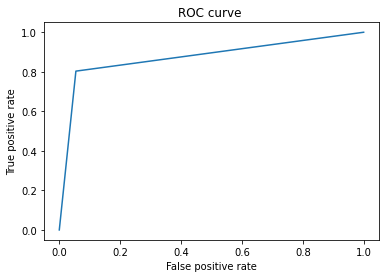

In [68]:
# fit logistic regression and draw ROC curve
model = LogisticRegression(C=1e5, solver='lbfgs')
log_reg = model.fit(X_train, y_train)

y_predict = log_reg.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)

plt.plot(fpr, tpr, )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ')
plt.show()

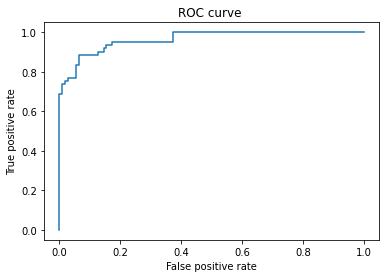

In [69]:
y_predict = log_reg.predict_log_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)

plt.plot(fpr, tpr, )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ')
plt.show()

In [71]:
# What happens to the "score" when C = 1, 1/10, 150, 100, 1000?

print(LogisticRegression(C=1, solver='lbfgs').fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(C=1/10, solver='lbfgs').fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(C=150, solver='lbfgs').fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(C=100, solver='lbfgs').fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(C=1000, solver='lbfgs').fit(X_train, y_train).score(X_test, y_test))

0.8888888888888888
0.9005847953216374
0.8947368421052632
0.8947368421052632
0.8947368421052632
